In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

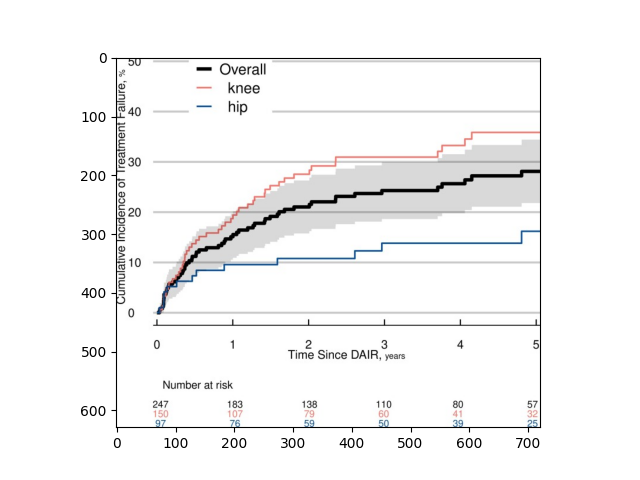

In [3]:
#load image
plt.figure()
img = cv2.imread('ofac363f1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
black_pixels = np.where(img[450, :, 0] <= 30)[0]
black_pixels

array([ 69, 198, 327, 455, 584, 713], dtype=int64)

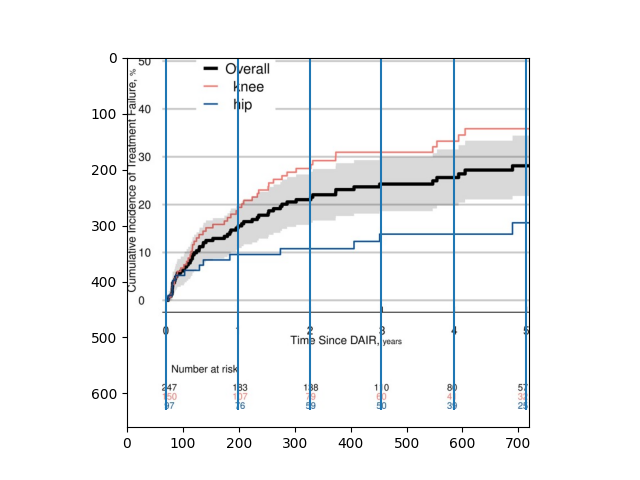

In [5]:
plt.figure()
plt.imshow(img)
plt.vlines(black_pixels, 0, img.shape[0])
plt.show()

In [14]:
def pixel_from_year(year:float) -> int:
    # get location of black pixels along a width of an image
    black_pixels = np.where(img[450, :, 0] <= 30)[0]
    year_pixels = round(np.mean(black_pixels[1:] - black_pixels[:-1]))
    # print(f'year_pixel_distance: {year_pixels}')

    return int(year_pixels * year + black_pixels[0])

In [28]:
# get the pixels close to a certain color from the image along a height
pixel_val = pixel_from_year(5)
# color_pixels = np.where((img[450, :, 0] >= color[0] - tolerance) & (img[450, :, 0] <= color[0] + tolerance) &
#                         (img[450, :, 1] >= color[1] - tolerance) & (img[450, :, 1] <= color[1] + tolerance) &
#                         (img[450, :, 2] >= color[2] - tolerance) & (img[450, :, 2] <= color[2] + tolerance))[0]
color_pixels = np.where((img[:453, pixel_val, 0] >= 130) & (img[:453, pixel_val, 0] < 250) &
                        (img[:453, pixel_val, 1] < 180) & (img[:453, pixel_val, 2] < 180) &
                        (img[:453, pixel_val, 0] != img[:453, pixel_val, 1]))[0]
color_pixels

array([127, 128], dtype=int64)

In [137]:
def get_height_location(horz_pixel_location: int) -> int:
    color_pixels = np.where((img[:453, pixel_val, 0] >= 130) & (img[:453, pixel_val, 0] < 250) &
                            (img[:453, pixel_val, 1] < 180) & (img[:453, pixel_val, 2] < 180) &
                            (img[:453, pixel_val, 0] != img[:453, pixel_val, 1]))[0]

    return round(np.mean(color_pixels))

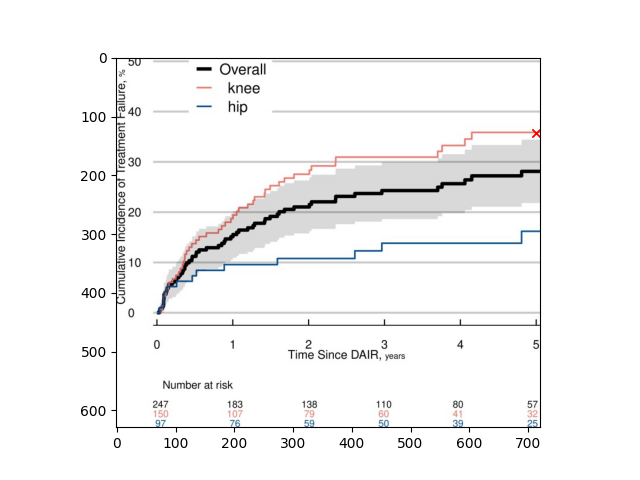

In [29]:
plt.figure()
plt.imshow(img)
plt.plot(np.ones_like(color_pixels) * pixel_val, color_pixels, 'x', color='red')
plt.show()

In [30]:
def get_incidence(width_pixels:int) -> float:
    inc_values = {0:434, 10:349, 20:263, 30:178, 40:92}
    cal_pixels = [*inc_values.values()][::-1]
    cal_values = [*inc_values.keys()][::-1]
    print(width_pixels)

    # get the incidence value from the image
    
    return np.interp(width_pixels, cal_pixels, cal_values)

get_incidence(round(np.mean(color_pixels)))

128


35.81395348837209

In [34]:
import scipy.stats as st
st.norm.ppf(.8)

0.8416212335729143

In [134]:
p_ref = 0.5#get_incidence(round(np.mean(color_pixels))) / 100
min_effect = -0.0 #5 / 100
p_experimental = p_ref - min_effect
power = 90
power = power / 100
alpha = .025
beta = 1 - power
zb = st.norm.ppf(beta)
za = st.norm.ppf(1 - (alpha))
print(f'za = {za}, zb = {zb}, p_ref = {p_ref}, p_study = {p_experimental}')

za = 1.959963984540054, zb = -1.2815515655446004, p_ref = 0.5, p_study = 0.5


In [135]:
sample_size = ((za - zb)**2 * (p_ref * (1 - p_ref) + p_experimental * (1 - p_experimental))) / (p_ref - p_experimental - 0.05)**2
sample_size

2101.4846122881236

In [136]:
def get_sample_size(p_reference, p_experimental, alpha, power, bound):
    '''
    Calculate the sample size for a given power, alpha, and bound
    '''
    ratio_power = power / 100
    beta = 1 - ratio_power
    zb = st.norm.ppf(beta)
    za = st.norm.ppf(1 - (alpha))
    sample_size = ((za - zb)**2 * (p_reference * (1 - p_reference) + p_experimental * (1 - p_experimental))) / (p_reference - p_experimental - bound)**2

    return sample_size